In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as patches

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
from kinematics import FiveBarsMechanism
import numpy as np

In [4]:
import analysis

In [5]:
angle_A_limits = [0, 200]
angle_B_limits = [-30, 180]
init_sampling = 10
area_sampling = 100

In [6]:

def show_space(R_A=30, R_B=30, L_A=50, L_B=50, d=15, theta_G=90):
    Ax=40
    Ay=45
    Bx=90
    By=35
    params = [Ax, Ay, Bx, By, R_A, R_B, L_A, L_B, d, theta_G]
    mechanism = FiveBarsMechanism(params)
    r = analysis.estimate_reachable_area(mechanism, angle_A_limits, angle_B_limits, init_sampling, area_sampling)
    f, axes = analysis.plot_reachable_area(r)
    print(r['biggest_rectangle']['x_length'], r['biggest_rectangle']['y_length'])

In [7]:
interact(show_space, R_A=(20,60), R_B=(20,60), L_A=(40,120), L_B=(40,120), d=(0, 50), theta_G=(30,120));


interactive(children=(IntSlider(value=30, description='R_A', max=60, min=20), IntSlider(value=30, description=…

In [72]:
#params = [ 0, 17, 50, -7, 20, 20, 56, 62,  0] # precision
#params = [0,0,40,0,40,40,50,50,0] # good space
params = [ 40, 45, 90, 35, 40, 40, 60, 50,  20, 90]
params = [ 40, 45, 90, 35, 30, 30, 60, 50,  15, 80]

In [73]:
params

[40, 45, 90, 35, 30, 30, 60, 50, 15, 80]

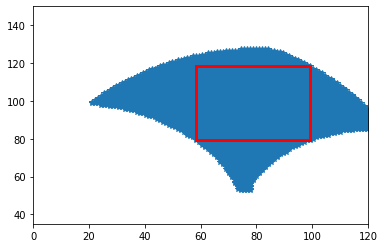

40.67605038775608 39.16922156242292


In [74]:
finger = FiveBarsMechanism(params)

angle_A_limits = [0, 180]
angle_B_limits = [0, 180]
angle_A_limits = [0, 200]
angle_B_limits = [-30, 180]
init_sampling = 10
area_sampling = 100

r = analysis.estimate_reachable_area(finger, angle_A_limits, angle_B_limits, init_sampling, area_sampling)
analysis.plot_reachable_area(r)
print(r['biggest_rectangle']['x_length'], r['biggest_rectangle']['y_length'])

In [75]:
#sample biggest_rectangle
area_sampling = 50

x_sampling = np.linspace(r['biggest_rectangle']['x_min'], r['biggest_rectangle']['x_max'], area_sampling)
y_sampling = np.linspace(r['biggest_rectangle']['y_min'], r['biggest_rectangle']['y_max'], area_sampling)

#x_sampling = r['x']
#y_sampling = r['y']
delta = 1
pos_error = analysis.estimate_precision(finger, x_sampling, y_sampling, delta, angle_A_limits, angle_B_limits)

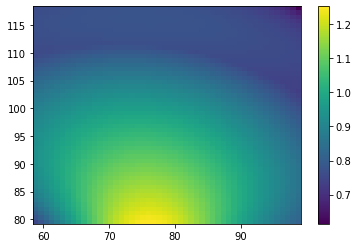

0.9160536726550623

In [79]:
plt.imshow(pos_error.T, aspect='auto', 
           origin='lower', 
           extent=[min(x_sampling),max(x_sampling),min(y_sampling),max(y_sampling)], 
           interpolation='nearest')
plt.colorbar()
plt.show()
pos_error.mean()

0.8264780740776368